# Reading level metrics

Nov 6, 2018

Calculate reading level via coverage on [NGSL](http://www.newgeneralservicelist.org/)


## Setup

In [0]:
import re

import matplotlib.pylab as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
% precision 2

import nltk
nltk.download('book', quiet=True)

True

In [0]:
brown = nltk.corpus.brown

## Flesch-Kincaid


Reuse old syllable counting function

In [0]:
cmudict = nltk.corpus.cmudict.dict()

def stress(pron):
  return [char for phone in pron for char in phone if char.isdigit()]

def syllables(text):
  return sum([w_syllables(w) for w in text if w.isalpha()])

def w_syllables(word):
  word = word.lower()
  if word in cmudict:
    return len(stress(cmudict[word][0]))
  else:
    s = len(re.findall(r'[aeiou]+', word))
    if re.search(r'[aeiou][^aeiou]+e$', word):
      s = s - 1
    return s

Flesch-Kincaid score for a sequence of sentences

$$FK=0.39\times\frac{\text{#words}}{\text{#sents}}+11.8\times\frac{\text{#syllables}}{\text{#words}}-15.59$$

In [0]:
def fk(corpus):
  sents = len(corpus)
  words = len([w for s in corpus for w in s if w.isalpha()])
  sylls = syllables([w for s in corpus for w in s])
  
  return 0.39*(words/sents) + 11.8*(sylls/words) - 15.59

In [6]:
print(f'{"":15} {"FK":>5}')
for cat in brown.categories():
    print(f'{cat:15} {fk(brown.sents(categories=cat)):5.2f}')

                   FK
adventure        4.96
belles_lettres  11.05
editorial        9.92
fiction          5.78
government      12.41
hobbies          9.21
humor            8.37
learned         12.19
lore            10.23
mystery          4.94
news            10.10
religion        10.70
reviews         10.70
romance          5.39
science_fiction  6.33


Grade level for State of the Union addresses, by year

Text(0.5,1,'State of the Union Addresses')

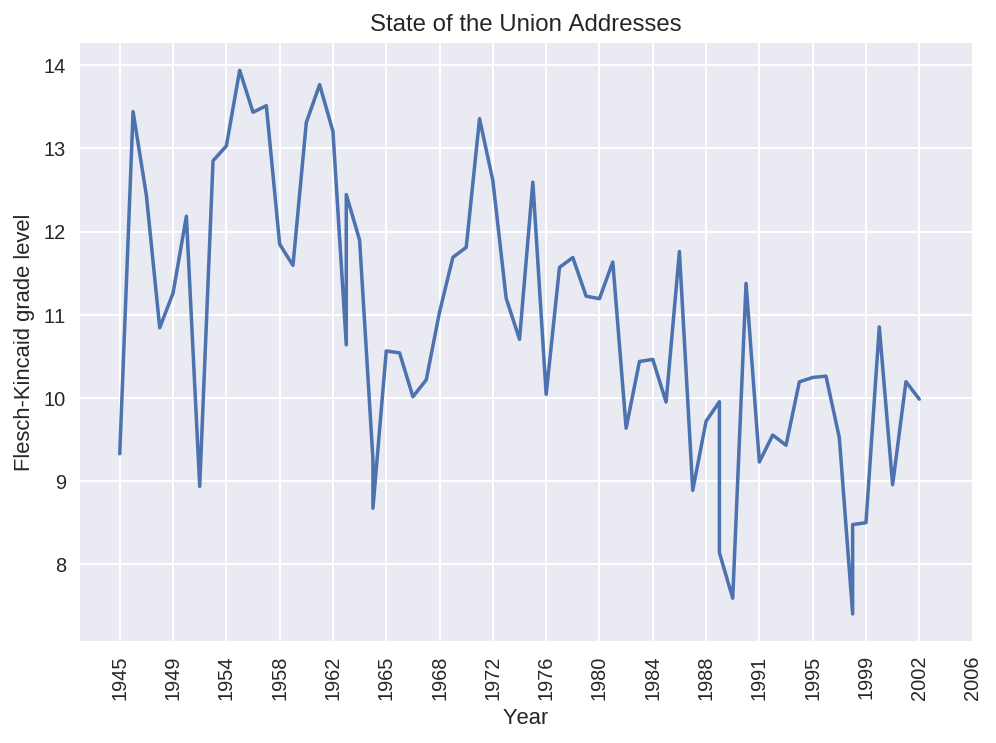

In [7]:
x = [f[0:4] for f in nltk.corpus.state_union.fileids()]
y = [fk(nltk.corpus.state_union.sents(f)) for f in nltk.corpus.state_union.fileids()]
        
  
plt.plot(x, y)
plt.xticks(range(0,len(x),4), x[::4], rotation=90, )   # only label every 4th year
plt.xlabel('Year')
plt.ylabel('Flesch-Kincaid grade level')
plt.title('State of the Union Addresses')

Grade level for inaugural addresses by year

Text(0.5,1,'Inaugural Addresses')

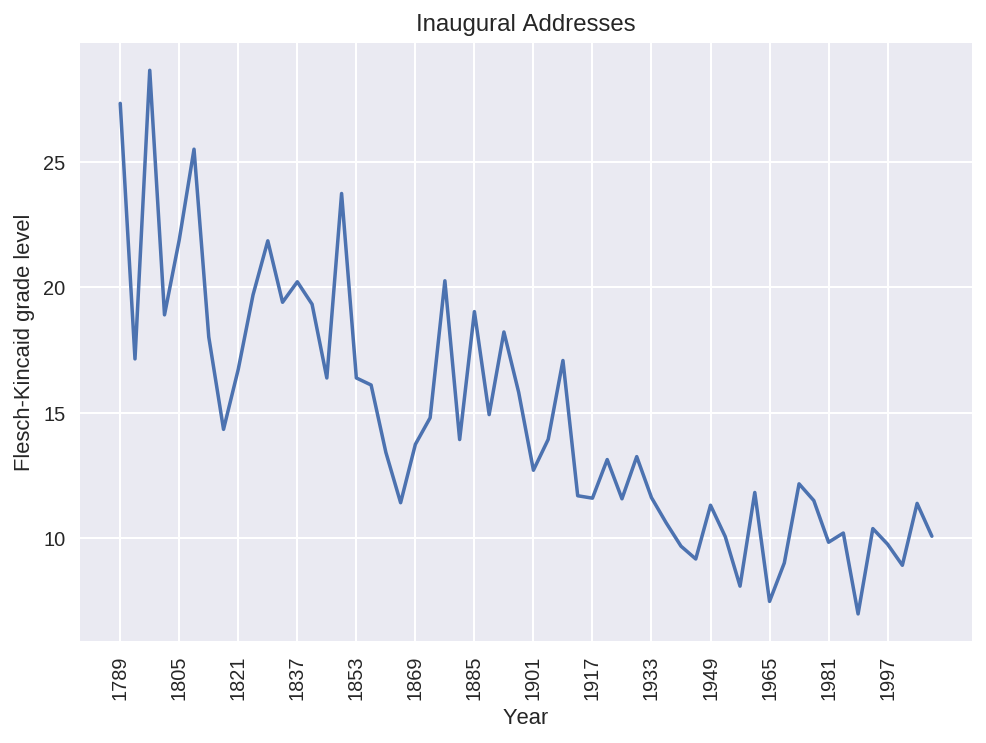

In [8]:
x = [f[0:4] for f in nltk.corpus.inaugural.fileids()]
y = [fk(nltk.corpus.inaugural.sents(f)) for f in nltk.corpus.inaugural.fileids()]

plt.plot(x, y)
plt.xticks(range(0,len(x),4), x[::4], rotation=90)   # only label every 4th year
plt.xlabel('Year')
plt.ylabel('Flesch-Kincaid grade level')
plt.title('Inaugural Addresses')

----

## Lexical coverage

Find % of tokens that are on the New General Service List

### Load the NGSL 

In [0]:
!pip install -q openpyxl

from openpyxl import load_workbook


In [0]:
!wget -q http://www.newgeneralservicelist.org/s/NGSL-101-by-band-qq9o.xlsx
  
wb = load_workbook('NGSL-101-by-band-qq9o.xlsx', read_only=True)
ngsl = set(c.value for ws in wb.sheetnames[:3]
                   for r in wb[ws].rows 
                   for c in r 
                   if type(c.value) is str)

In [0]:
!wget -q http://www.newacademicwordlist.org/s/NAWL_Lemmas.csv
  
nasl = set(w for r in open('NAWL_Lemmas.csv', encoding='latin1')
             for w in r.strip().split(','))

In [0]:
!wget -q http://www.newgeneralservicelist.org/s/BSL_101_lemmatized_for_research.csv
  
bsl = set(w for r in open('BSL_101_lemmatized_for_research.csv', encoding='latin1')
             if not r.startswith('#') 
            for w in r.strip().split(',')
             if w)


In [45]:
len(ngsl), len(nasl), len(bsl)

(8481, 2604, 5111)

In [0]:
ngsl_bsl = ngsl.union(bsl)

### Tokenizer

Re-tokenize Brown corpus following NGSL assumptions

In [0]:
def retok(words):
  text = ' '.join(words)
  return nltk.regexp_tokenize(text.lower(), r'[a-z0-9]+')

### NGSL coverage in Brown corpus

In [0]:
def cov(words):
  return len([w for w in words if w in ngsl]) / len(words) * 100

In [49]:
print(f'{"":15} {"cov":>5}')
for cat in brown.categories():
    print(f'{cat:15} {cov(brown.words(categories=cat)):5.2f}')

                  cov
adventure       63.56
belles_lettres  67.65
editorial       66.49
fiction         65.29
government      67.51
hobbies         66.92
humor           63.53
learned         68.82
lore            67.43
mystery         64.94
news            61.77
religion        68.24
reviews         62.30
romance         64.36
science_fiction 63.52


### NGSL coverage in SOTU corpus

### NGSL coverage in Inaugural corpus